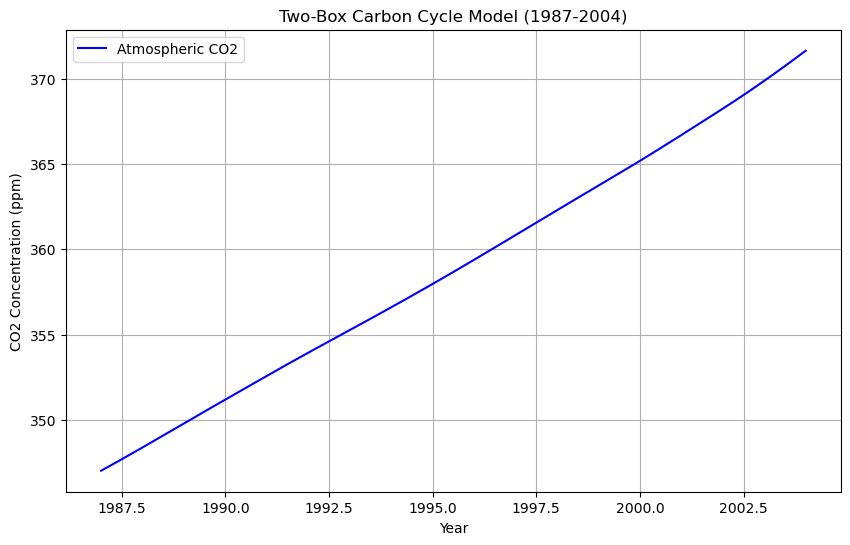

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

# Load gamma values from the file
data = pd.read_csv('global.1751_2014_new.csv')

# Extract years and total carbon emissions (1987-2004)
gamma_data = data.loc[(data['Year'] >= 1987) & (data['Year'] <= 2004), 
                      ['Year', 'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)']]

# Convert emissions to PgC/year (divide by 1000) 单位：百万公吨，需要转换成ppm
gamma_data['gamma'] = gamma_data.iloc[:, 1] / 1000 / 2.13

# Define a function to interpolate gamma values
def get_gamma(t):
    """
    Interpolate gamma value for a given time t from the data.
    """
    years = gamma_data['Year'] - 1987  # Adjust years to start from 0
    gamma_values = gamma_data['gamma']
    return np.interp(t, years, gamma_values)

# Define model parameters
k12 = 105 / 740  # Transfer coefficient from atmosphere to ocean
k21 = 102 / 900  # Transfer coefficient from ocean to atmosphere

# Differential equations
def carbon_flux(y, t):
    """
    Define the coupled differential equations.
    y[0] = N1 (atmospheric CO2)
    y[1] = N2 (ocean surface CO2)
    """
    N1, N2 = y
    
    # Get gamma value at the current time t
    gamma = get_gamma(t)
    
    # Equations from the model
    dN1_dt = -k12 * N1 + k21 * N2 + gamma
    dN2_dt = k12 * N1 - k21 * N2
    
    return [dN1_dt, dN2_dt]

# Set up time points (1987 to 2004)
t = np.linspace(0, 17, 204)  # Monthly resolution for 17 years

# Initial conditions (1987 values in ppm)
N1_0 = 347  # Atmospheric CO2 concentration in 1987 (740PgC = 347ppm)
N2_0 = 422.54  # Approximate ocean surface CO2 (900PgC = 422.54ppm)
y0 = [N1_0, N2_0]

# Solve the differential equations
solution = odeint(carbon_flux, y0, t)

# Extract results
N1_solution_without_buffer = solution[:, 0]  # Atmospheric CO2
N2_solution_without_buffer = solution[:, 1]  # Ocean surface CO2

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(1987 + t, N1_solution_without_buffer, 'b-', label='Atmospheric CO2')
# plt.plot(1987 + t, N2_solution, 'g-', label='Ocean Surface CO2')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Two-Box Carbon Cycle Model (1987-2004)')
plt.grid(True)
plt.legend()
plt.show()

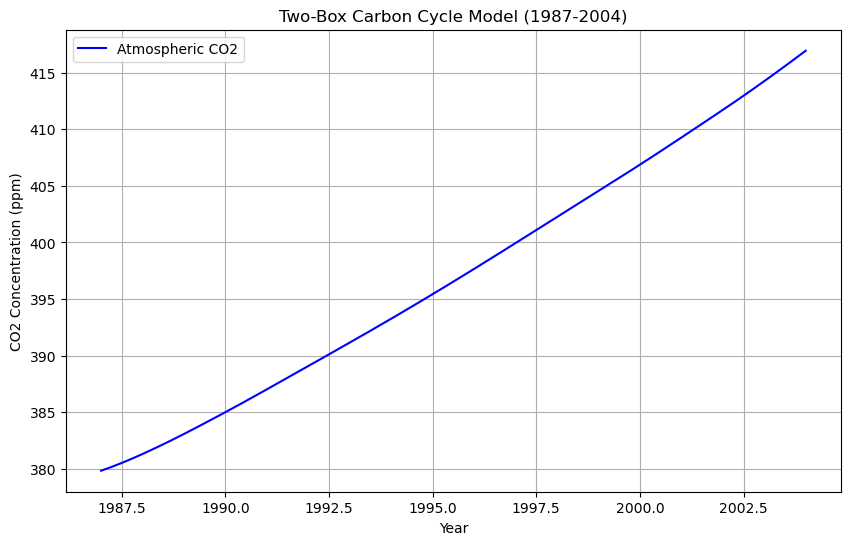

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

# Load gamma values from the file
data = pd.read_csv('global.1751_2014_new.csv')

# Extract years and total carbon emissions (1987-2004)
gamma_data = data.loc[(data['Year'] >= 1987) & (data['Year'] <= 2004), 
                      ['Year', 'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)']]

# Convert emissions to PgC/year (divide by 1000) 单位：百万公吨，需要转换成ppm
gamma_data['gamma'] = gamma_data.iloc[:, 1] / 1000 / 2.13

# Define a function to interpolate gamma values
def get_gamma(t):
    """
    Interpolate gamma value for a given time t from the data.
    """
    years = gamma_data['Year'] - 1987  # Adjust years to start from 0
    gamma_values = gamma_data['gamma']
    return np.interp(t, years, gamma_values)

# Define model parameters
k12 = 105 / 809  # Transfer coefficient from atmosphere to ocean
k21 = 102 / 821  # Transfer coefficient from ocean to atmosphere

# Equilibrium values
N2_eq = 821/2.13  # Ocean equilibrium value 821PgC = 900 − 79)
xi = 3  # Example buffer factor, modify as necessary

# Differential equations
def carbon_flux(y, t):
    """
    Define the coupled differential equations.
    y[0] = N1 (atmospheric CO2)
    y[1] = N2 (ocean surface CO2)
    """
    N1, N2 = y
    
    # Get gamma value at the current time t
    gamma = get_gamma(t)
    
    # Equations from the model
    dN1_dt = -k12 * N1 + k21 * (N2_eq + xi * (N2 - N2_eq)) + gamma
    dN2_dt = k12 * N1 - k21 * (N2_eq + xi * (N2 - N2_eq))
    
    return [dN1_dt, dN2_dt]

# Set up time points (1987 to 2004)
t = np.linspace(0, 17, 204)  # Monthly resolution for 17 years

# Initial conditions (1987 values in ppm)
N1_0 = 809/2.13  # Atmospheric CO2 concentration in 1987 (809PgC)
N2_0 = 821/2.13  # Approximate ocean surface CO2 (821PgC)
y0 = [N1_0, N2_0]

# Solve the differential equations
solution = odeint(carbon_flux, y0, t)

# Extract results
N1_solution_with_buffer = solution[:, 0]  # Atmospheric CO2
N2_solution_with_buffer = solution[:, 1]  # Ocean surface CO2

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(1987 + t, N1_solution_with_buffer, 'b-', label='Atmospheric CO2')
# plt.plot(1987 + t, N2_solution, 'g-', label='Ocean Surface CO2')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Two-Box Carbon Cycle Model (1987-2004)')
plt.grid(True)
plt.legend()
plt.show()

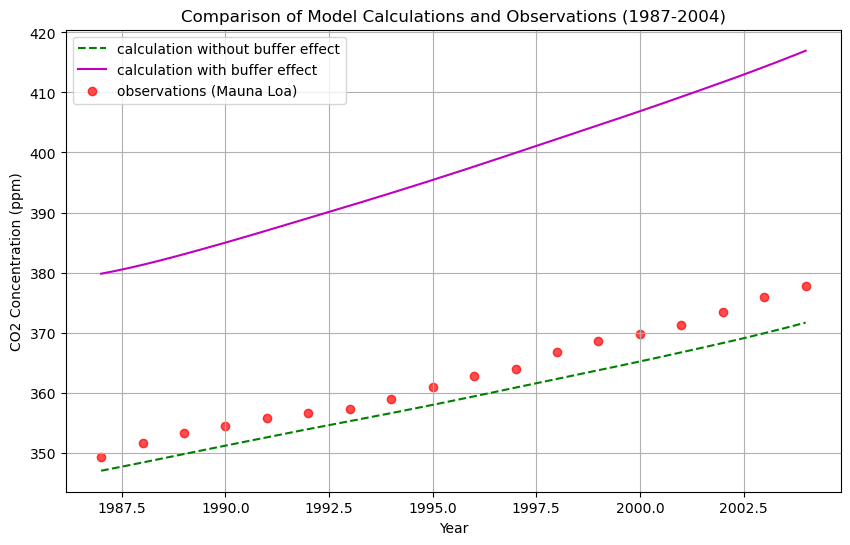

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the observational data (Mauna Loa CO2 data)
obs_data = pd.read_csv('co2_annmean_mlo.csv')

# Filter the observational data for the years 1987 to 2004
obs_data_filtered = obs_data[(obs_data['year'] >= 1987) & (obs_data['year'] <= 2004)]

# Extract the filtered years and CO2 concentrations
filtered_years = obs_data_filtered['year']
filtered_co2 = obs_data_filtered['mean']

# Plot the results with observational data
plt.figure(figsize=(10, 6))
plt.plot(1987 + t, N1_solution_without_buffer, 'b--', label='calculation without buffer effect')
plt.plot(1987 + t, N1_solution_with_buffer, 'm-', label='calculation with buffer effect')
plt.scatter(filtered_years, filtered_co2, color='r', label='observations (Mauna Loa)', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Comparison of Model Calculations and Observations (1987-2004)')
plt.grid(True)
plt.legend()
plt.show()